Chris Panican <br/>
Project <br/>
Machine Learning <br/>

insert number and figure out where

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('rent.csv')
df.head()

,bath,bed,price,size,street,where,boro
0,1.0,1.0,2750,750.0,564 Morgan Avenue #1R,Greenpoint,Brooklyn
1,1.0,2.0,2599,850.0,41-49 45th Street #2A,Sunnyside,Queens
2,1.0,1.0,3610,683.0,175 Kent Avenue #515,Williamsburg,Brooklyn
3,1.0,1.0,3750,666.0,305 West 50th Street #8E,Midtown West,Manhattan
4,1.0,3.0,3000,1000.0,254 Manhattan Avenue #3A,Central Harlem,Manhattan


In [3]:
# df.to_csv("rent2.csv", index=False)

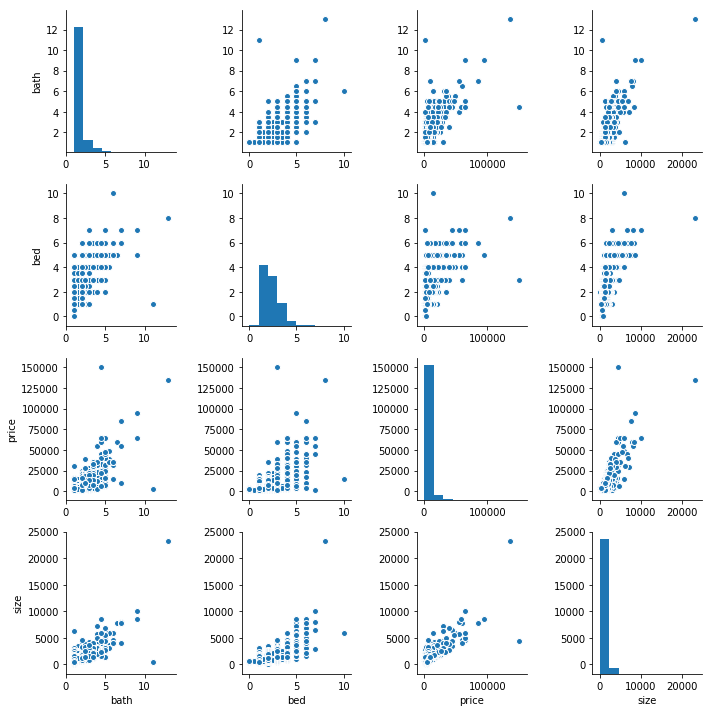

In [4]:
cols = ["bath", "bed", "price", "size", "where"]
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

In [5]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl,edgecolor='black')
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='test set')

In [6]:
def select_location(location):
    print(df.loc[df['where'] == location])

In [7]:
# select_location("Flushing")

In [8]:
# select_location("East Village")

In [9]:
# Linear Regression

In [10]:
# Helper function that prints validation data and test data
def print_validation_test_data(regressors, feature_num, test_size, random_state):
    le = preprocessing.LabelEncoder()
    df2 = df.apply(le.fit_transform)
    X_features = [x for x in range(df2.shape[1]) if x != feature_num]
    X = df2.loc[:, :'size']
    y = df2.loc[:, 'where':'where']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the regressors
    method = regressors
    
    method.fit(X_train, y_train.values.ravel())
    y_train_pred = method.predict(X_train)
    y_test_pred = method.predict(X_test)
    
    # Train_score and test_score
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    validation_score = method.score(X_val, y_val)
    
    # Print
    reg_name = str(regressors).split('(', 1)[0]
    print("{}\nTraining: {}\nValidation: {}\nTest: {}\n".format(reg_name, train_score, validation_score, test_score))

In [11]:
regressors = [LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=1.0), ElasticNet(alpha=1.0), SVR(C=1.0)]

feature_num = 3
test_size = 0.2
random_state = 1

for i in regressors:
    print_validation_test_data(i, feature_num, test_size, random_state)

LinearRegression
Training: 0.04141029984140554
Validation: 0.05124233149460822
Test: 0.043311076325576736

Ridge
Training: 0.04141029981601896
Validation: 0.05124233648663579
Test: 0.04331149861666994

Lasso
Training: 0.04090405932472785
Validation: 0.05110324194552862
Test: 0.044906560936270434

ElasticNet
Training: 0.04113067573203544
Validation: 0.0511265014413943
Test: 0.04454299637889192

SVR
Training: 0.054963562696978774
Validation: 0.055671887256899096
Test: 0.025579647709887188



In [12]:
# Logistic Regression

In [13]:
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('rent.csv')
X = df.loc[:, :'size']
y = df.loc[:, 'where':'where']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_train_combined=np.concatenate([y_train.values.ravel(), y_test.values.ravel()],axis=0)
y_combined = np.hstack((y_train_combined))

C_val = 100.0
lr = LogisticRegression(C=C_val, random_state=1)
lr.fit(X_train_std, np.ravel(y_train,order='C'))
print('Accuracy: %.2f' % lr.score(X_test_std, y_test))

Accuracy: 0.09


In [14]:
# SVM 
from sklearn.svm import SVC

In [15]:
X = df.loc[:, :'size']
y = df.loc[:, 'where':'where']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [16]:
clf = SVC(kernel='rbf', gamma=0.00000001, C=1)

In [17]:
clf.fit(X_train, y_train.values.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-08, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Bath, bed, price, sqft
clf.predict([[1.0, 2.0, 1300, 600]])

array(['Astoria'], dtype=object)

In [19]:
print(clf.score(X_test, y_test))

0.0832672482157


In [20]:
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-08, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)